In [2]:
from KGS import *
from matplotlib.patches import Polygon

# Phonons

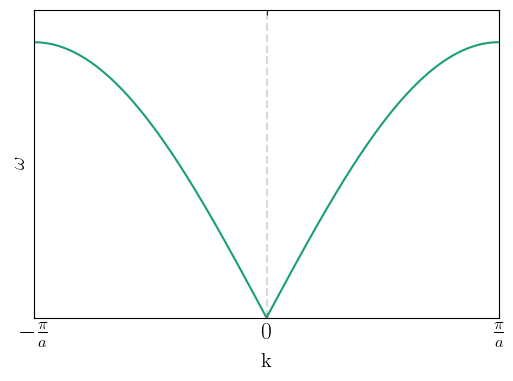

In [3]:
from numpy import linspace
from pyparsing import alphas


def phonon(x):
    return 2*np.sqrt(5)*np.abs(np.sin((2*x)/(2))) 


plt.figure(figsize=(6,4))

k_range = np.linspace(-np.pi/2, np.pi/2, 1000)
zero = np.zeros(100)
omega = linspace(0, 5, len(zero))


plt.plot(k_range, phonon(k_range))
plt.plot(zero,omega,'--', color='grey', alpha=0.3)
plt.ylim(0,5)
plt.xlim(-np.pi/2, np.pi/2)
plt.xticks([-np.pi/2, 0, np.pi/2],
           [r'$-\frac{\pi}{a}$', r'$0$', r'$\frac{\pi}{a}$'],fontsize=17)
plt.yticks([])
plt.ylabel(r'$\omega$')
plt.xlabel(r'k')

plt.savefig('phonon_figure.pdf', format='pdf', bbox_inches='tight')

# ToF geometries

In [4]:
def calc_q(ki, kf, A4):   
    qx = ki-kf*np.cos(np.radians(A4))
    qy = -kf*np.sin(np.radians(A4))
    Q = np.stack((qx,qy))#.reshape(2,-1)
    #Rot_matrix = np.array([[np.cos(A3), -np.sin(A3)],[np.sin(A3), np.cos(A3)]])
    #Q = np.dot(Rot_matrix, Q)
    return Q

def calc_DE(ki, kf):
    Ei = (1.4395*ki)**2
    Ef = (1.4395*kf)**2 
    return Ei-Ef

In [5]:
# Direkte

kf_di = np.linspace(0,2.5, 100)
ki_di = np.ones(100)*1.55338

q_di = calc_q(ki_di, kf_di, 0)
Q_di = np.sqrt(q_di[0]**2 + q_di[1]**2)
DE_di = calc_DE(ki_di,kf_di)

q_di_2 = calc_q(ki_di, kf_di, 180)
Q_di_2 = np.sqrt(q_di_2[0]**2 + q_di_2[1]**2)
DE_di_2 = calc_DE(ki_di,kf_di)

q_di_3 = calc_q(ki_di, kf_di, 90)
Q_di_3 = np.sqrt(q_di_3[0]**2 + q_di_3[1]**2)
DE_di_3 = calc_DE(ki_di,kf_di)

q_di_4 = calc_q(ki_di, kf_di, 45)
Q_di_4 = np.sqrt(q_di_4[0]**2 + q_di_4[1]**2)
DE_di_4 = calc_DE(ki_di,kf_di)

# Indirect

ki_indi = np.linspace(0,2.5, 100)
kf_indi = np.ones(100)*1.55338

q_indi = calc_q(ki_indi, kf_indi, 0)
Q_indi = np.sqrt(q_indi[0]**2 + q_indi[1]**2)
DE_indi = calc_DE(ki_indi,kf_indi)

q_indi_2 = calc_q(ki_indi, kf_indi, 180)
Q_indi_2 = np.sqrt(q_indi_2[0]**2 + q_indi_2[1]**2)
DE_indi_2 = calc_DE(ki_indi,kf_indi)

q_indi_3 = calc_q(ki_indi, kf_indi, 90)
Q_indi_3 = np.sqrt(q_indi_3[0]**2 + q_indi_3[1]**2)
DE_indi_3 = calc_DE(ki_indi,kf_indi)

q_indi_4 = calc_q(ki_indi, kf_indi, 45)
Q_indi_4 = np.sqrt(q_indi_4[0]**2 + q_indi_4[1]**2)
DE_indi_4 = calc_DE(ki_indi,kf_indi)



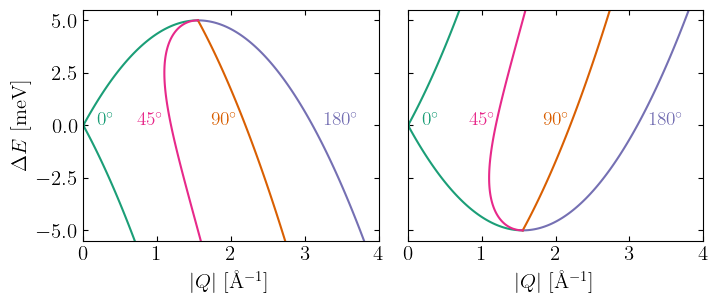

In [6]:


from cProfile import label


fig, ax = plt.subplots(1,2, figsize=(8,3), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.1)

ax[0].plot(Q_di,DE_di, label='A4=0')
ax[0].text(0.3, 1e-3, r'0$^{\circ}$', fontsize=14, ha='center', color='#1b9e77')
ax[0].plot(Q_di_2,DE_di_2, label='A4=180')
ax[0].text(3.5, 1e-3, r'180$^{\circ}$', fontsize=14, ha='center', color='#7570b3')
ax[0].plot(Q_di_3,DE_di_3, label='A4=90')
ax[0].text(1.9, 1e-3, r'90$^{\circ}$', fontsize=14, ha='center', color='#d95f02')
ax[0].plot(Q_di_4,DE_di_4, label='A4=90')
ax[0].text(0.9, 1e-3, r'45$^{\circ}$', fontsize=14, ha='center', color='#e7298a')
#ax[0].set_title('Direct')
#ax[0].grid()
ax[0].set_xlabel(r'$|Q|$ [Å$^{-1}$]')
ax[0].set_ylabel(r'$\Delta E$ [meV]')
ax[0].set_ylim(-5.5, 5.5)
ax[0].set_xlim(0, 4)


ax[1].plot(Q_indi,DE_indi)
ax[1].text(0.3, 1e-3, r'0$^{\circ}$', fontsize=14, ha='center', color='#1b9e77')
ax[1].plot(Q_indi_2,DE_indi_2)
ax[1].text(3.5, 1e-3, r'180$^{\circ}$', fontsize=14, ha='center', color='#7570b3')
ax[1].plot(Q_indi_3,DE_indi_3, label='A4=90')
ax[1].text(2.0, 1e-3, r'90$^{\circ}$', fontsize=14, ha='center', color='#d95f02')
ax[1].plot(Q_indi_4,DE_indi_4, label='A4=90')
ax[1].text(1.0, 1e-3, r'45$^{\circ}$', fontsize=14, ha='center', color='#e7298a')
#ax[1].set_title('Indirect')
#ax[1].grid()
ax[1].set_xlabel(r'$|Q|$ [Å$^{-1}$]')

plt.savefig('ToF_geometries_nogrid.pdf', format='pdf', bbox_inches='tight')

# ToF diagrams

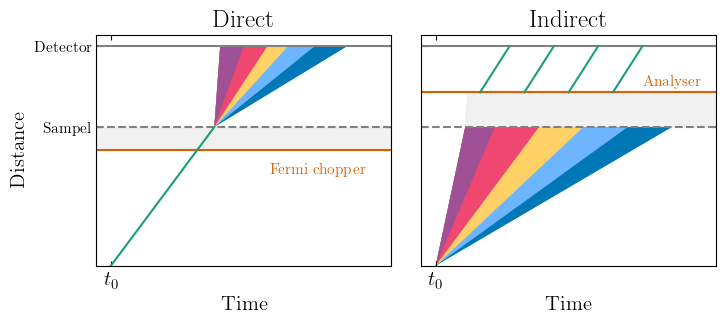

In [7]:
fig, ax = plt.subplots(1,2, figsize=(8,3), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.1)

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_yticks([0.60, 0.95],[r'Sampel',r'Detector'], fontsize=11)
ax[0].set_xticks([0.05],[r'$t_0$'])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Distance')
ax[1].set_xlabel('Time')

ax[0].plot([0,1], [0.60,0.60], '--', color='grey')
ax[0].plot([0,1], [0.95,0.95], '-', color='grey')
ax[0].plot([0,1], [0.50,0.50], '-', color='#d95f02')
ax[0].set_title('Direct')

v = [(0, 0.5), (0, 0.6), (1, 0.60), (1, 0.5)]
parallelogram = Polygon(v, closed=True, edgecolor='lightgray', facecolor='lightgray', alpha=0.3)
ax[0].add_patch(parallelogram)
ax[0].text(0.75, 0.4, r'Fermi chopper', fontsize=11, ha='center', color='#d95f02')

ax[0].plot([0.05, 0.4],[0,0.60])
v1 = [(0.4, 0.6), (0.42, 0.95), (0.85, 0.95)]
parallelogram1 = Polygon(v1, closed=True, edgecolor=None, facecolor='#0077B6')
ax[0].add_patch(parallelogram1)

v2 = [(0.4, 0.6), (0.42, 0.95), (0.74, 0.95)]
parallelogram2 = Polygon(v2, closed=True, edgecolor=None, facecolor='#6EB5FF')
ax[0].add_patch(parallelogram2)

v3 = [(0.4, 0.6), (0.42, 0.95), (0.65, 0.95)]
parallelogram3 = Polygon(v3, closed=True, edgecolor=None, facecolor='#FFD166')
ax[0].add_patch(parallelogram3)

v4 = [(0.4, 0.6), (0.42, 0.95), (0.58, 0.95)]
parallelogram4 = Polygon(v4, closed=True, edgecolor=None, facecolor='#EF476F')
ax[0].add_patch(parallelogram4)

v5 = [(0.4, 0.6), (0.42, 0.95), (0.50, 0.95)]
parallelogram5 = Polygon(v5, closed=True, edgecolor=None, facecolor='#A05195')
ax[0].add_patch(parallelogram5)



ax[1].plot([0,1], [0.60,0.60], '--', color='grey')
ax[1].plot([0,1], [0.95,0.95], '-', color='grey')
ax[1].plot([0,1], [0.75,0.75], '-', color='#d95f02')

vertices = [(0.15, 0.60), (0.16, 0.75), (1, 0.75), (1, 0.60)]
parallelogram = Polygon(vertices, closed=True, edgecolor='lightgray', facecolor='lightgray', alpha=0.3)
ax[1].add_patch(parallelogram)

vertices1 = [(0.05, 0), (0.15, 0.60), (0.85, 0.60)]
parallelogram1 = Polygon(vertices1, closed=True, edgecolor=None, facecolor='#0077B6')
ax[1].add_patch(parallelogram1)

vertices2 = [(0.05, 0), (0.15, 0.60), (0.7, 0.60)]
parallelogram2 = Polygon(vertices2, closed=True, edgecolor=None, facecolor='#6EB5FF')
ax[1].add_patch(parallelogram2)

vertices3 = [(0.05, 0), (0.15, 0.60), (0.55, 0.60)]
parallelogram3 = Polygon(vertices3, closed=True, edgecolor=None, facecolor='#FFD166')
ax[1].add_patch(parallelogram3)

vertices4 = [(0.05, 0), (0.15, 0.60), (0.4, 0.60)]
parallelogram4 = Polygon(vertices4, closed=True, edgecolor=None, facecolor='#EF476F')
ax[1].add_patch(parallelogram4)

vertices5 = [(0.05, 0), (0.15, 0.60), (0.25, 0.60)]
parallelogram5 = Polygon(vertices5, closed=True, edgecolor=None, facecolor='#A05195')
ax[1].add_patch(parallelogram5)

ax[1].plot([0.2,0.3], [0.75,0.95], '-', color='#1b9e77')
ax[1].plot([0.35,0.45], [0.75,0.95], '-', color='#1b9e77')
ax[1].plot([0.5,0.6], [0.75,0.95], '-', color='#1b9e77')
ax[1].plot([0.65,0.75], [0.75,0.95], '-', color='#1b9e77')
ax[1].text(0.85, 0.78, r'Analyser', fontsize=11, ha='center', color='#d95f02')
ax[1].set_title('Indirect')
plt.savefig('ToF_diagrams.pdf', format='pdf', bbox_inches='tight')

In [10]:
BA_matrix = pd.read_csv('../Analyzer_positions/Bifrost_Analyzer_2.7meV_L1andL2is1100and1189mm_7Blades.txt')
print(BA_matrix.to_latex(index=False))

\begin{tabular}{lr}
\toprule
Data in analyzer frame - central blade is at (0 & 0)  \\
\midrule
Y-axis is vertical - x-axis along the Q-channel center (analyzer axis)  & NaN \\
Distance from sample: 1100 mm  & NaN \\
Distance from detector: 1189 mm  & NaN \\
Gap size: 2 mm  & NaN \\
Energy: 2.7 meV  & NaN \\
Position of detector (in the global sample coordinate system - see figure) - X = 688.7723 mm. Y = -1115.6222 mm.   & NaN \\
2Theta coverage of analyzer: 5.2 degrees  & NaN \\
Bragg angle: 55.1172 degrees  & NaN \\
Length of each blade: 134 mm  & NaN \\
Corresponding 2theta coverage: 6.969 degrees  & NaN \\
Proposed length of active detector tube: 217.9 mm  & NaN \\
Width of each blade: 12 mm  & NaN \\
Total area of analyzer: 11251.9266 mm  & NaN \\
Total area of all analyzers of this energy: 0.101 m^2  & NaN \\
Vertical angular coverage: 2 deg.  & NaN \\
_____________________________________________________  & NaN \\
Here follows a list of blade axis positions and analyzer take-off 